In [ ]:
%tensorflow_version 2.x

In [ ]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2020-08-06 04:55:34--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-08-06 04:55:34--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb0491046e2c963c1b5aab664e3.dl.dropboxusercontent.com/cd/0/inline/A84smvTSu7cFVKe5NO_2DnfsMxmKY1o0RtscMFnJrm0XyiVU81AmXeqZhbNvcnMb3tLFuSR04MSJUjbx33onuRUldfopIY1IqQILY1KeQFZwmQ/file# [following]
--2020-08-06 04:55:34--  https://ucb0491046e2c963c1b5aab664e3.dl.dropboxusercontent.com/cd/0/inline/A84smvTSu7cFVKe5NO_2DnfsMxmKY1o0RtscMFnJrm0Xy

In [ ]:
!unzip state-farm-distracted-driver-detection.zip

Archive:  state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [ ]:
!unzip imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  
  inflating: train/c7/img_57733.jpg  

In [ ]:
import pandas as pd

In [ ]:
labels=pd.read_csv('/content/driver_imgs_list.csv')

In [ ]:
labels.head()

subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

In [ ]:
len(labels)

22424

In [ ]:
output_sample=pd.read_csv('/content/sample_submission.csv')

In [ ]:
output_sample.head()

img   c0   c1   c2   c3   c4   c5   c6   c7   c8   c9
0       img_1.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
1      img_10.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
2     img_100.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
3    img_1000.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
4  img_100000.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1

In [ ]:
import random
import numpy as np
import torch

In [ ]:
SEED = 1337

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)#to generate random numbers in current GPU
torch.backends.cudnn.deterministic = True#for deterministic experiments

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')#using cuda device number:0, object where torch.Tensor will be allocated

In [ ]:
torch.cuda.device_count() #no. of GPUs available
print(torch.cuda.get_device_name())#device name
torch.cuda.device_count()

Tesla T4


1

In [ ]:
# torch.manual_seed(2)
# print(torch.rand(2))

# print('9'*20)

# print(torch.rand(2))

# print('9'*20)

# torch.manual_seed(2)
# print(torch.rand(2))# call with torch.manual_Seed(2) to reproduce

tensor([0.6147, 0.3810])
99999999999999999999
tensor([0.6371, 0.4745])
99999999999999999999
tensor([0.6147, 0.3810])


In [ ]:
output_sample.loc[2:15,:]

img   c0   c1   c2   c3   c4   c5   c6   c7   c8   c9
2      img_100.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
3     img_1000.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
4   img_100000.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
5   img_100001.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
6   img_100002.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
7   img_100003.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
8   img_100004.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
9   img_100005.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
10  img_100007.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
11  img_100008.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
12  img_100009.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
13   img_10001.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
14  img_100010.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
15  img_100011.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1

In [ ]:
train_data='/content/state-farm-distracted-driver-detection/train'

In [ ]:
test_data='/content/state-farm-distracted-driver-detection/test'

In [ ]:
len(train_data),len(test_data)

(53, 52)

In [ ]:
train_data,test_data

('/content/state-farm-distracted-driver-detection/train',
 '/content/state-farm-distracted-driver-detection/test')

In [ ]:
import torchvision

In [ ]:
train_images=torchvision.datasets.ImageFolder(root=train_data) #generic data loader

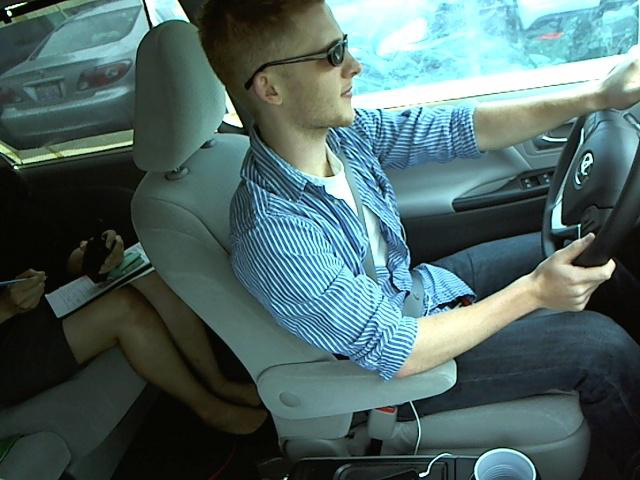

In [ ]:
train_images[0][0]

In [ ]:
import os

In [ ]:
os.listdir(train_data)# list of classes in train

['c6', 'c2', 'c8', 'c0', 'c9', 'c4', 'c7', 'c1', 'c5', 'c3']

In [ ]:
os.listdir(test_data)

['img_8523.jpg',
 'img_7869.jpg',
 'img_56872.jpg',
 'img_60977.jpg',
 'img_28057.jpg',
 'img_89487.jpg',
 'img_66699.jpg',
 'img_65722.jpg',
 'img_78649.jpg',
 'img_14854.jpg',
 'img_48716.jpg',
 'img_84780.jpg',
 'img_14583.jpg',
 'img_76753.jpg',
 'img_10430.jpg',
 'img_45108.jpg',
 'img_4386.jpg',
 'img_33746.jpg',
 'img_69339.jpg',
 'img_14582.jpg',
 'img_1986.jpg',
 'img_26321.jpg',
 'img_61883.jpg',
 'img_37518.jpg',
 'img_33223.jpg',
 'img_65214.jpg',
 'img_1901.jpg',
 'img_45262.jpg',
 'img_53842.jpg',
 'img_86649.jpg',
 'img_94833.jpg',
 'img_21881.jpg',
 'img_31779.jpg',
 'img_7997.jpg',
 'img_74970.jpg',
 'img_12556.jpg',
 'img_6890.jpg',
 'img_53450.jpg',
 'img_42201.jpg',
 'img_46788.jpg',
 'img_10533.jpg',
 'img_77022.jpg',
 'img_95700.jpg',
 'img_97633.jpg',
 'img_64047.jpg',
 'img_89417.jpg',
 'img_25539.jpg',
 'img_52097.jpg',
 'img_64849.jpg',
 'img_62267.jpg',
 'img_35660.jpg',
 'img_40178.jpg',
 'img_86749.jpg',
 'img_55497.jpg',
 'img_8760.jpg',
 'img_85019.jpg',


In [ ]:
# len(os.listdir(os.path.join(train_img_dir,'c9')))
training_samples = 0
for i in os.listdir(train_data):
  training_samples += len(os.listdir(os.path.join(train_data,i)))
  print(training_samples,i)

assert(training_samples == len(labels))#checks whether the condition is True, else AssertionError
assert(len(os.listdir(test_data)) == len(output_sample))

2325 c6
4642 c2
6553 c8
9042 c0
11171 c9
13497 c4
15499 c7
17766 c1
20078 c5
22424 c3


In [ ]:
os.listdir(os.path.join(train_data,'c3')) #no. of sub directories in train/c3

['img_62877.jpg',
 'img_73861.jpg',
 'img_91939.jpg',
 'img_46497.jpg',
 'img_81736.jpg',
 'img_84374.jpg',
 'img_82783.jpg',
 'img_20055.jpg',
 'img_48460.jpg',
 'img_84290.jpg',
 'img_37915.jpg',
 'img_87160.jpg',
 'img_95998.jpg',
 'img_91351.jpg',
 'img_74168.jpg',
 'img_6836.jpg',
 'img_34827.jpg',
 'img_81493.jpg',
 'img_50738.jpg',
 'img_11248.jpg',
 'img_7075.jpg',
 'img_71790.jpg',
 'img_1257.jpg',
 'img_94722.jpg',
 'img_68570.jpg',
 'img_58362.jpg',
 'img_89368.jpg',
 'img_87177.jpg',
 'img_74311.jpg',
 'img_31811.jpg',
 'img_39566.jpg',
 'img_100818.jpg',
 'img_44987.jpg',
 'img_65012.jpg',
 'img_98031.jpg',
 'img_9529.jpg',
 'img_65215.jpg',
 'img_71513.jpg',
 'img_92750.jpg',
 'img_43631.jpg',
 'img_11712.jpg',
 'img_95496.jpg',
 'img_61144.jpg',
 'img_39288.jpg',
 'img_54444.jpg',
 'img_98242.jpg',
 'img_60065.jpg',
 'img_101856.jpg',
 'img_52775.jpg',
 'img_4518.jpg',
 'img_10748.jpg',
 'img_36909.jpg',
 'img_31948.jpg',
 'img_76235.jpg',
 'img_93642.jpg',
 'img_28583.j

In [ ]:
len(train_data),len(labels),len(output_sample),len(test_data)

(53, 22424, 79726, 52)

In [ ]:
training_samples,len(os.listdir(test_data))

(22424, 79726)

In [ ]:
train_images.class_to_idx

{'c0': 0,
 'c1': 1,
 'c2': 2,
 'c3': 3,
 'c4': 4,
 'c5': 5,
 'c6': 6,
 'c7': 7,
 'c8': 8,
 'c9': 9}

In [ ]:
labels.classname.map(train_images.class_to_idx)

0        0
1        0
2        0
3        0
4        0
        ..
22419    9
22420    9
22421    9
22422    9
22423    9
Name: classname, Length: 22424, dtype: int64

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
def plot_images(images):
  n_images = len(images)

  rows = int(np.sqrt(n_images))
  cols = int(np.sqrt(n_images))

 
  # rows = 5
  # cols = 2

  fig = plt.figure(figsize=(30,20))
  
  for i in range(rows*cols):
    ax = fig.add_subplot(rows,cols,i+1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.set_title(f'{images[i][1]}')
    ax.imshow(np.array(images[i][0]))
    ax.axis('off')
    


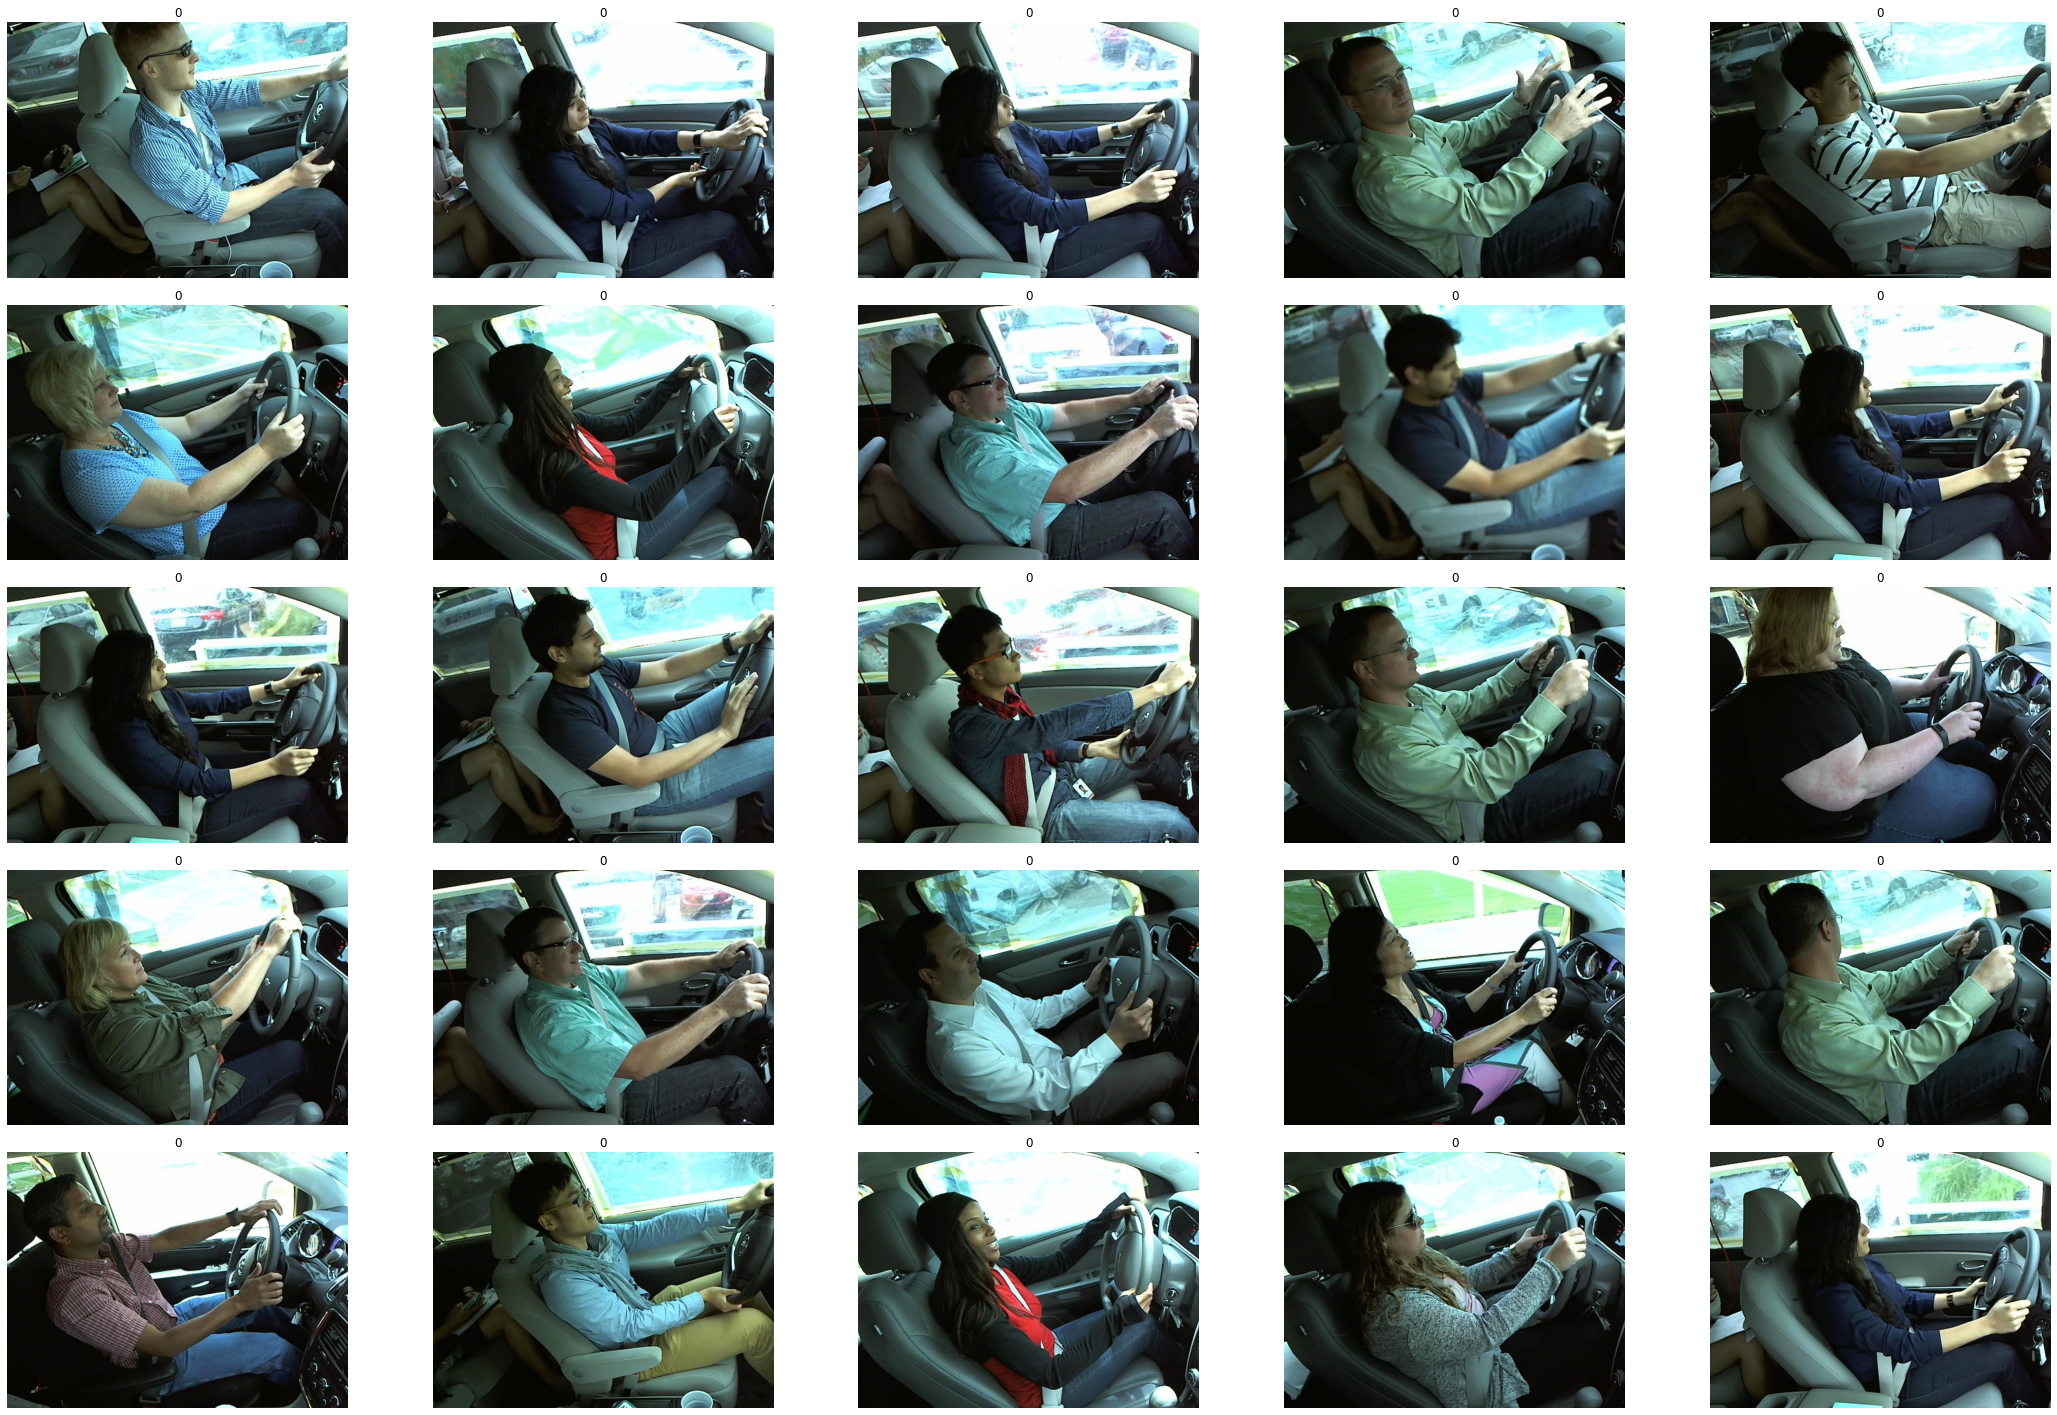

In [ ]:
num_of_images = 25

images = [ (image, label) for image,label in [train_images[i] for i in range(num_of_images)]]
plot_images(images)

In [ ]:
images# images and their labels are stored in images

[(<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7B38>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7A90>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7BE0>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7C50>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7CC0>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7D30>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7DA0>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7E10>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7E80>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7EF0>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7F60>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE7FD0>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE6080>, 0),
 (<PIL.Image.Image image mode=RGB size=640x480 at 0x7F2914CE60F0>, 0),
 (<PIL

In [ ]:
ratio = 0.9
num_of_training_data = int(len(train_images)*ratio)
num_of_validation_data = len(train_images) - num_of_training_data

training_data, validation_data = torch.utils.data.random_split(train_images, [num_of_training_data, num_of_validation_data])

In [ ]:
len(training_data),len(validation_data)

(20181, 2243)

In [ ]:
from torchvision import transforms

In [ ]:
normalize = transforms.Normalize(
    mean = [0.485,0.456,0.406],
    std = [0.229,0.224,0.225]
)



In [ ]:
train_transforms = transforms.Compose([transforms.Resize(256),
                               transforms.CenterCrop(224),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               normalize])
valid_transforms = transforms.Compose([transforms.Resize(256),
                               transforms.CenterCrop(224),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               normalize])


In [ ]:
valid_transforms,train_transforms

(Compose(
     Resize(size=256, interpolation=PIL.Image.BILINEAR)
     CenterCrop(size=(224, 224))
     RandomHorizontalFlip(p=0.5)
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ), Compose(
     Resize(size=256, interpolation=PIL.Image.BILINEAR)
     CenterCrop(size=(224, 224))
     RandomHorizontalFlip(p=0.5)
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ))

In [ ]:
training_data.dataset.transform = train_transforms

In [ ]:
import copy

In [ ]:
validation_data = copy.deepcopy(validation_data)
validation_data.dataset.transform = valid_transforms

In [ ]:
training_data.dataset.transform,validation_data.dataset.transform

(Compose(
     Resize(size=256, interpolation=PIL.Image.BILINEAR)
     CenterCrop(size=(224, 224))
     RandomHorizontalFlip(p=0.5)
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ), Compose(
     Resize(size=256, interpolation=PIL.Image.BILINEAR)
     CenterCrop(size=(224, 224))
     RandomHorizontalFlip(p=0.5)
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ))

In [ ]:
print(f'Number of training samples: {len(training_data)}')
print(f'Number of validation samples: {len(validation_data)}')

Number of training samples: 20181
Number of validation samples: 2243


In [ ]:
from torch.utils.data import DataLoader, Dataset

In [ ]:
batch = 256
train_iterators = DataLoader(training_data, shuffle = True, batch_size=batch)
valid_iterators = DataLoader(validation_data, shuffle = True, batch_size=batch*2)

In [ ]:
len(train_iterators),len(valid_iterators)

(79, 5)

In [ ]:
#To compute no. of trainable parameters:

# model_parameters = filter(lambda p: p.requires_grad, model.parameters())
# params = sum([np.prod(p.size()) for p in model_parameters])


def count_parameters(model): 
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
from torchvision import models

In [ ]:
model = models.resnet18(pretrained=True) #18
print(model)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [ ]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

11689512

In [ ]:
for p in model.parameters():
  if p.requires_grad:
    print(p)

Parameter containing:
tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01]

In [ ]:
for p in model.parameters():
  if p.requires_grad:
    print(p.numel())


9408
64
64
36864
64
64
36864
64
64
36864
64
64
36864
64
64
73728
128
128
147456
128
128
8192
128
128
147456
128
128
147456
128
128
294912
256
256
589824
256
256
32768
256
256
589824
256
256
589824
256
256
1179648
512
512
2359296
512
512
131072
512
512
2359296
512
512
2359296
512
512
512000
1000


In [ ]:
def epoch_time(start_time, end_time):
  elapsed_time = end_time - start_time
  elapsed_mins = int(elapsed_time/60)
  elapsed_secs = int(elapsed_time - (elapsed_mins*60))
  return elapsed_mins, elapsed_secs

In [ ]:
def calculate_accuracy(y_pred, y_actual):
  top_pred = y_pred.argmax(1, keepdim = True)
  num_of_correct = top_pred.eq(y_actual.view_as(top_pred)).sum()
  acc = num_of_correct.float() / y_actual.shape[0]
  return acc

In [ ]:
from torch.autograd import Variable

In [ ]:
for (a, b) in train_iterators:

  a = Variable(torch.FloatTensor(np.array(a))).to(device)#FloatTensor:32-bit floating point(image to array to float)
  b = Variable(torch.LongTensor(b)).to(device)#label

print(b)

tensor([9, 6, 8, 4, 0, 7, 2, 6, 8, 1, 6, 1, 3, 7, 5, 7, 6, 7, 8, 2, 0, 8, 8, 4,
        3, 2, 3, 9, 9, 0, 5, 8, 5, 9, 6, 1, 3, 1, 4, 7, 8, 1, 5, 4, 9, 6, 5, 8,
        7, 4, 5, 2, 0, 7, 9, 5, 7, 9, 9, 5, 8, 6, 0, 5, 6, 3, 3, 1, 1, 5, 2, 2,
        3, 2, 6, 3, 3, 4, 5, 1, 6, 4, 1, 5, 4, 6, 0, 0, 3, 5, 9, 4, 9, 2, 9, 4,
        3, 3, 6, 2, 3, 9, 5, 2, 3, 0, 5, 6, 6, 4, 8, 3, 4, 5, 3, 1, 3, 0, 5, 7,
        3, 7, 4, 5, 5, 0, 3, 8, 4, 5, 2, 9, 6, 7, 8, 4, 7, 0, 6, 3, 9, 5, 9, 7,
        4, 6, 8, 8, 8, 8, 2, 3, 4, 7, 9, 5, 1, 4, 4, 4, 1, 0, 7, 7, 5, 5, 1, 0,
        7, 1, 4, 0, 6, 0, 9, 9, 2, 1, 3, 0, 0, 2, 1, 6, 9, 6, 8, 8, 7, 2, 0, 2,
        8, 6, 0, 6, 8, 9, 8, 9, 6, 9, 0, 6, 0, 2, 6, 8, 9, 1, 8, 8, 7],
       device='cuda:0')


In [ ]:
train_iterators

In [ ]:
def train(model, iterator, optimizer, criterion, device):

  epoch_loss = 0
  epoch_acc = 0

  model.train()#Tells the model that it is being trained(learn various layers)

  for (x, y) in iterator:

    x = Variable(torch.FloatTensor(np.array(x))).to(device)#FloatTensor:32-bit floating point
    y = Variable(torch.LongTensor(y)).to(device)#LongTensor:64 bit Int type

    optimizer.zero_grad()# resets the gradients after every batch
    y_pred = model(x)#predicts on x(img in float)
    loss = criterion(y_pred,y)#criterion(outputs,labels) calculate loss
    acc = calculate_accuracy(y_pred, y)
    loss.backward()# backpropage the loss and compute the gradients
    optimizer.step()#update the weights

    epoch_loss += loss.item()# Loss value
    epoch_acc += acc.item()

  return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion, device):

  epoch_loss = 0
  epoch_acc = 0

  model.eval()#it tells the model that it is being used for testing(not learning)

  with torch.no_grad():# Disables Gradient calculation,reduce memeory usage and speed's up(no back prop)

    for (x, y) in iterator:

      x = Variable(torch.FloatTensor(np.array(x))).to(device)
      y = Variable(torch.LongTensor(y)).to(device)

      y_pred = model(x)#feeding input
      loss = criterion(y_pred,y)
      acc = calculate_accuracy(y_pred, y)

      epoch_loss += loss.item()
      epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def fit_model(model, model_name, train_iterators, valid_iterators, optimizer, loss_criterion, device, epochs):
  best_valid_loss = float('inf')#setting initial loss to infinity

  train_losses = []
  valid_losses = []
  train_accs = []
  valid_accs = []

  for epoch in range(epochs):
    

    start_time = time.time()
    train_loss, train_acc = train(model, train_iterators, optimizer, loss_criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterators, loss_criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accs.append(train_acc*100)
    valid_accs.append(valid_acc*100)

    if valid_loss < best_valid_loss:
      best_valid_loss = valid_loss
      torch.save(model.state_dict(), f'{model_name}.pt')
      end_time = time.time()
      epoch_mins, epoch_secs = epoch_time(start_time, end_time)

      print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')#
      print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
      print(f'\t Val. Loss: {valid_loss:.3f} | Val.acc: {valid_acc*100:.2f}%')

  return pd.DataFrame({f'{model_name}_Training_Loss':train_losses,
                       f'{model_name}_Training_Acc':train_accs,
                       f'{model_name}_Validation_Loss':valid_losses,
                       f'{model_name}_Validation_Acc':valid_accs})


In [ ]:
for name, param in model.named_parameters():
  print(name)

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.we

In [ ]:
for name, param in model.named_parameters():
  if('bn' not in name):#batch norm parameters
    param.requires_grad = False

In [ ]:
from torch import nn, optim

In [ ]:
model.fc = nn.Linear(model.fc.in_features, 10)#(no. of features, classes)from flattened layer to fc layer to classify

In [ ]:
model.fc.in_features

512

In [ ]:
device

device(type='cuda', index=0)

In [89]:
for p in model.parameters():
  if p.requires_grad:
    print(p.numel())

64
64
64
64
64
64
64
64
64
64
128
128
128
128
128
128
128
128
256
256
256
256
256
256
256
256
512
512
512
512
512
512
512
512
5120
10


In [ ]:
model = model.to(device)#model moved to GPU
loss_criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr = 1e-2)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 12,938 trainable parameters


In [ ]:
optimizer,loss_criterion

(Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.01
     weight_decay: 0
 ), CrossEntropyLoss())

In [ ]:
import time

In [ ]:
train_stats_ResNet18 = fit_model(model, 'ResNet18', train_iterators, valid_iterators, 
                                 optimizer, loss_criterion, device, epochs=10)

Epoch: 01 | Epoch Time: 3m 57s
	Train Loss: 0.824 | Train Acc: 76.18%
	 Val. Loss: 0.358 | Val.acc: 87.62%
Epoch: 02 | Epoch Time: 4m 0s
	Train Loss: 0.128 | Train Acc: 96.75%
	 Val. Loss: 0.276 | Val.acc: 90.66%
Epoch: 04 | Epoch Time: 4m 1s
	Train Loss: 0.073 | Train Acc: 97.85%
	 Val. Loss: 0.173 | Val.acc: 94.60%
Epoch: 05 | Epoch Time: 4m 0s
	Train Loss: 0.058 | Train Acc: 98.36%
	 Val. Loss: 0.152 | Val.acc: 95.75%
Epoch: 10 | Epoch Time: 4m 2s
	Train Loss: 0.029 | Train Acc: 99.16%
	 Val. Loss: 0.105 | Val.acc: 97.26%
